In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style='whitegrid')

## TODOs
- [ ] Replace left and right with ptotic and normal 
- [ ] Adjust the similarity equation such that ptotic/normal * 100 
- $Similarity = \dfrac{Ptotic}{Normal} * 100$
- [ ] How file is read ? (My convention is right eye contour , left eye contour , right eye pupil , left eye pupil)
- [ ] GUI

In [2]:
def read_coordinates(filename,split_idx):
    coordinates = []
    with open(filename,'r') as coord_file:
        while True:
            p = coord_file.readline().strip('\n')
            if p == '':
                break
            try:
                x,y = p.split('\t')
                coordinates.append((float(x),float(y)))
            except ValueError:
                split_idx = int(p)
    left_pupil = coordinates.pop() # last coord
    right_pupil = coordinates.pop() # before last coord 
    upper_right_contour = coordinates[:split_idx]
    upper_left_contour = coordinates[split_idx:]
    return upper_right_contour,upper_left_contour, right_pupil,left_pupil
            

def choose_best_fit_degree(contour,degree):
    x = [c[0]/100 for c in contour]
    y = [c[1]/100 for c in contour]
    p = np.polyfit(x,y,degree)
    return x , np.poly1d(p)

def compute_similarity(right_eye_feature,left_eye_feature,ptotic):
    if ptotic == 'r':
        return round(100 * right_eye_feature / left_eye_feature,2)
    else:
        return round(100 * left_eye_feature / right_eye_feature,2)

def plot_contour(right_contour,left_contour,right_pupil,left_pupil,ptotic,degree):
    if not plt.gca().yaxis_inverted():
        plt.gca().invert_yaxis()
    plt.scatter(right_pupil[0]/100,right_pupil[1]/100,c='r')
    plt.scatter(left_pupil[0]/100,left_pupil[1]/100,c='b')

    #################### CHOOSING THE FIT ##########################
    x_right,fx = choose_best_fit_degree(right_contour,degree)
    print(f"Equation of the right eye : \n {fx}")
    x_left,gx = choose_best_fit_degree(left_contour,degree)
    print(f"Equation of the left eye: \n {gx}")

    #################### PLOTTING THE FIT ##########################
    x_right_new = np.linspace(min(x_right),max(x_right),100)
    y_right_new = fx(x_right_new)
    plt.plot(x_right_new,y_right_new,c='r')

    x_left_new = np.linspace(min(x_left),max(x_left),100)
    y_left_new = gx(x_left_new)
    plt.plot(x_left_new,y_left_new,c='b')

    plt.xlim(min(x_right)-1,max(x_left)+1)

    ## MRD plot line
    plt.plot([right_pupil[0]/100,right_pupil[0]/100], [right_pupil[1]/100,fx(right_pupil[0]/100) ], linestyle='--',color='r')
    plt.plot([left_pupil[0]/100,left_pupil[0]/100], [left_pupil[1]/100,gx(left_pupil[0]/100) ], linestyle='--',color='b')
    
    # PHUL plotline
    plt.plot([x_right_new[np.argmin(fx(x_right_new))],x_right_new[np.argmin(fx(x_right_new))]],[min(fx(x_right_new)),right_pupil[1]/100],linestyle='--',color='r')
    plt.plot([x_left_new[np.argmin(gx(x_left_new))],x_left_new[np.argmin(gx(x_left_new))]],[min(gx(x_left_new)),left_pupil[1]/100],linestyle='--',color='b')
    plt.show()
    ######################### MRD1 , PHUL , Similarity ############################
    ########################### MRD1 ##################################
    mrd1_right = abs(round((fx(right_pupil[0]/100) - right_pupil[1]/100),2))
    print(f"MRD1 right eye : {mrd1_right} cm" )

    mrd1_left = abs(round((gx(left_pupil[0]/100) - left_pupil[1]/100),2))
    print(f"MRD1 left eye : {mrd1_left} cm" )

    ########################### PHUL ##################################
    mrd1phul_right = abs(x_right_new[np.argmin(fx(x_right_new))] - right_pupil[0]/100)
    print(f"PHUL - MRD1 right_eye: {round(mrd1phul_right,5)} cm")

    mrd1phul_left = abs(x_left_new[np.argmin(gx(x_left_new))] - left_pupil[0]/100)

    print(f"PHUL - MRD1 left_eye: {round(mrd1phul_left,5)} cm")

    ########################### SIMILARITY ##################################
    print(f"Similarity between MRD1 in both eyes :{compute_similarity(mrd1_right,mrd1_left,ptotic)} %")
    print(f"Similarity between PHUL - MRD1 in both eyes :{compute_similarity(mrd1phul_right,mrd1phul_left,ptotic)} %")
    


Equation of the right eye : 
          4          3         2
0.04419 x - 0.6874 x + 4.277 x - 12.26 x + 17.98
Equation of the left eye: 
         4         3         2
0.1023 x - 3.733 x + 51.41 x - 316.4 x + 738.4


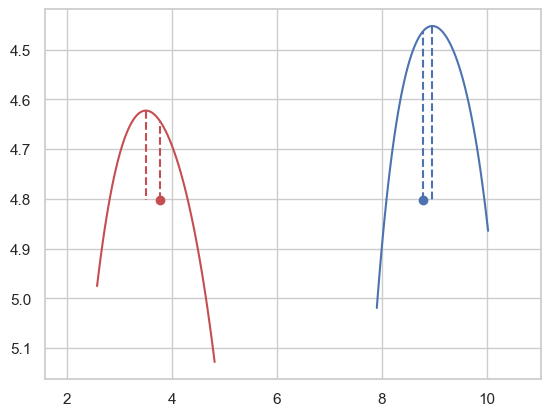

MRD1 right eye : 0.16 cm
MRD1 left eye : 0.34 cm
PHUL - MRD1 right_eye: 0.27982 cm
PHUL - MRD1 left_eye: 0.17596 cm
Similarity between MRD1 in both eyes :47.06 %
Similarity between PHUL - MRD1 in both eyes :159.03 %


In [7]:
upper_right_contour,upper_left_contour,right_pupil,left_pupil = read_coordinates('preop.txt',10)
plot_contour(upper_right_contour,upper_left_contour,right_pupil,left_pupil,'r',4)

Equation of the right eye : 
         4         3         2
0.2173 x - 1.143 x + 2.691 x - 3.256 x + 3.594
Equation of the left eye: 
          4         3         2
-0.1232 x + 2.588 x - 19.62 x + 62.85 x - 68.16


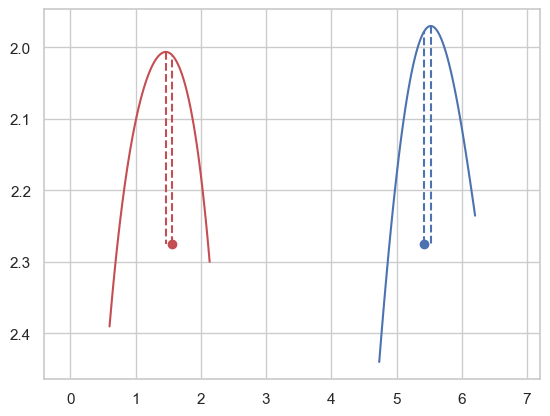

MRD1 right eye : 0.26 cm
MRD1 left eye : 0.3 cm
PHUL - MRD1 right_eye: 0.09672 cm
PHUL - MRD1 left_eye: 0.09697 cm
Similarity between MRD1 in both eyes :86.67 %
Similarity between PHUL - MRD1 in both eyes :99.74 %


In [8]:
upper_right_contour,upper_left_contour,right_pupil,left_pupil = read_coordinates('postop.txt',10)

plot_contour(upper_right_contour,upper_left_contour,right_pupil,left_pupil,'r',4)